In [1]:
import import_ipynb

In [2]:
%%capture
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from main import calc_diff;
from main import correct_seconds_spoken;

In [3]:
df1 = pd.read_csv('data/csv/us_election_2020_1st_presidential_debate.csv')
df2 = pd.read_csv('data/csv/us_election_2020_2nd_presidential_debate.csv')
vp = pd.read_csv('data/csv/us_election_2020_vice_presidential_debate.csv')

In [4]:
def make_heatmap(df,a,b,c):
    df['minute'].fillna('00:00', inplace=True)

    df.loc[df['speaker'] == 'President Donald J. Trump','speaker'] = 'Donald Trump'
    df.loc[df['speaker'] == 'Vice President Joe Biden','speaker'] = 'Joe Biden'
    df.loc[df['speaker'] == 'Chris Wallace:','speaker'] = 'Chris Wallace'
    
    calc_diff(df)
    correct_seconds_spoken(df)
    df.drop(['seconds','minute'],axis=1,inplace=True)
    df['tem']=df['seconds_spoken'].cumsum()
    df['tem']=df['tem'].apply(lambda x : int(x))
    df_copy = df.copy()

    df_copy.loc[df_copy['speaker'] == 'Donald Trump','speaker'] = 0
    df_copy.loc[df_copy['speaker'] == 'Chris Wallace','speaker'] = 1
    df_copy.loc[df_copy['speaker'] == 'Kristen Welker','speaker'] = 1
    df_copy.loc[df_copy['speaker'] == 'Joe Biden','speaker'] = 2

    df_copy.loc[df_copy['speaker'] == 'Mike Pence','speaker'] = 0
    df_copy.loc[df_copy['speaker'] == 'Susan Page','speaker'] = 1
    df_copy.loc[df_copy['speaker'] == 'Kamala Harris','speaker'] = 2
    df_copy.loc[df_copy['speaker'] == 'Kamala Harris ','speaker'] = 2

    df_copy.drop(columns=['text','seconds_spoken'],inplace=True)
    df_copy.reset_index(drop=True,inplace=True)
    df_copy.set_index('tem',inplace=True)
    df_copy_pivot = df_copy.pivot_table(values='speaker',columns='tem',aggfunc='first')

    plt.figure(figsize = (25,6))
    ax = sns.heatmap(df_copy_pivot,xticklabels=False,yticklabels=False,cmap='coolwarm',cbar=False);
    custom_lines = [Line2D([0], [0], color='#ff0000', lw=4),Line2D([0], [0], color='#ffffff', lw=4),Line2D([0], [0], color='#0000ff', lw=4)]
    ax.legend(custom_lines,[b,'Moderator',c],bbox_to_anchor=(0.65, 0),title='Speakers',ncol=3,prop={'size': 20},frameon=False).get_frame().set_facecolor('#f5f7fa')
    plt.xlabel('')
    plt.ylabel('')
    plt.title(f'Flow of the {a} Presidential debate',size=30,pad=40)
    plt.tight_layout()
    return ax

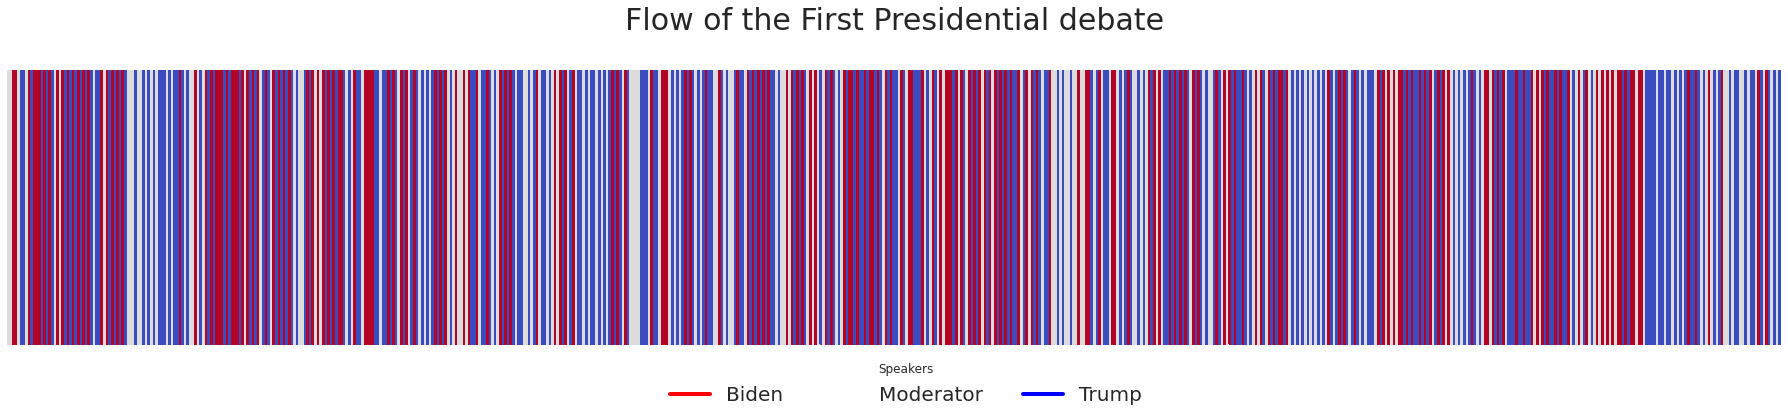

In [5]:
first = make_heatmap(df1,'First','Biden','Trump')
# first.figure.savefig('images/plots/first.jpg')

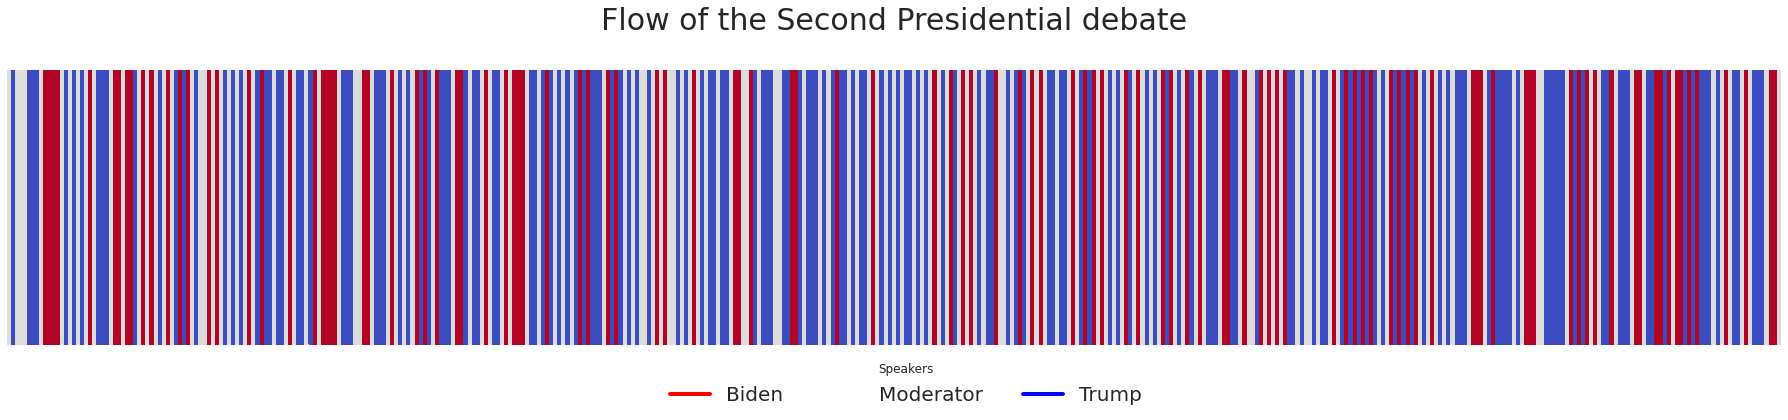

In [6]:
second = make_heatmap(df2,'Second','Biden','Trump')
# second.figure.savefig('images/plots/second.jpg')

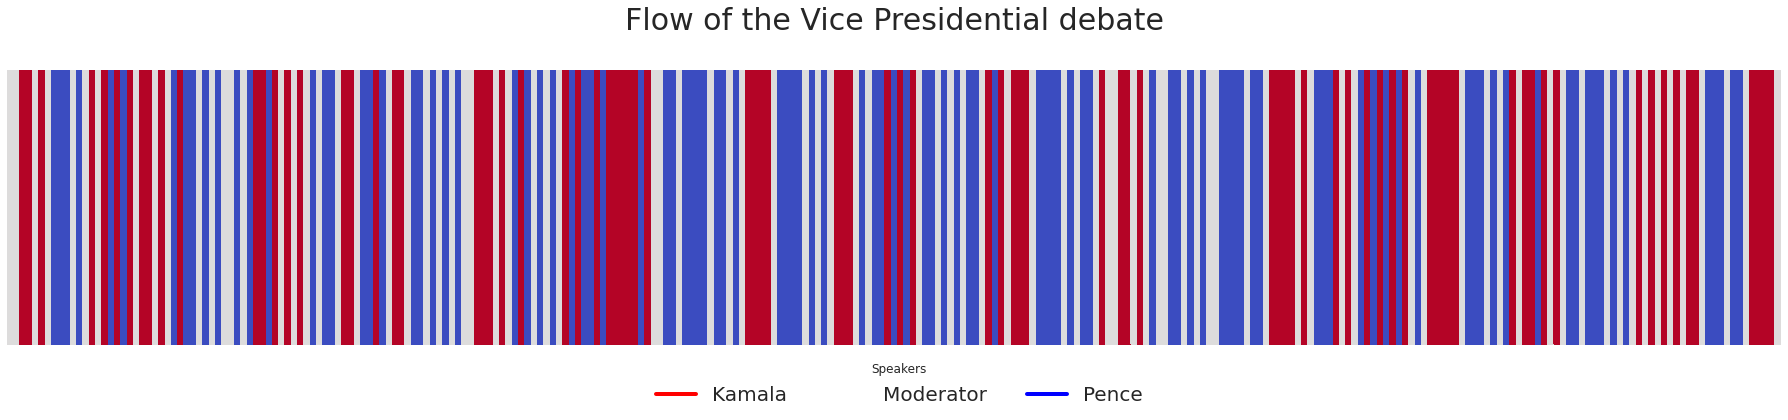

In [7]:
vp_map = make_heatmap(vp,'Vice','Kamala','Pence')
# vp_map.figure.savefig('images/plots/vp_map.jpg')